<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/training/pandas_merge_iterrows_itertuples/pandas_merge_iterrows_itertuples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/AnalitykEduPL/Najwazniejsze-biblioteki-Python/blob/master/Pandas.ipynb
import pandas as pd

# Pandas Series

Pandas Series, jest jednym z dwóch podstawowych typów danych w Pandas. Jest to typ, który reprezentuje jedną kolumnę. Spójrzmy na kilka operacji

In [ ]:
a = pd.Series([-1,1,3,5,7])

In [ ]:
a * 10

0   -10
1    10
2    30
3    50
4    70
dtype: int64

In [ ]:
a.abs()

0    1
1    1
2    3
3    5
4    7
dtype: int64

In [ ]:
a.describe()

count    5.000000
mean     3.000000
std      3.162278
min     -1.000000
25%      1.000000
50%      3.000000
75%      5.000000
max      7.000000
dtype: float64


Domyślnym indexem, są liczby, zaczynające sie od 0. Możemy to zmienić

In [ ]:
a.index = ['Pierwsza','Druga','Trzecia','Czwarta','Piąta']
a

Pierwsza   -1
Druga       1
Trzecia     3
Czwarta     5
Piąta       7
dtype: int64

In [ ]:
a['Piąta']

7

# Pandas DataFrame

Drugim, po Pandas Series, podsawowym typem danych w Pandas, to DataFrame. Jest to typ wielo-kolumnowy, który możemy porównać do efektywniejszej tabeli w Excelu. To właśnie na nim będziemy wykonywać większość operacji w Pandas.

## Tworzenie DataFrame

### Na bazie listy

DataFrame, można tworzyć na wiele sposobów. Pierwszy to, na bazie listy.

In [ ]:
a = [['Ania',24],['Michał',9],['Darek',40],['Ewa',43]]
df_a = pd.DataFrame(a)
print(df_a)
print()
df_a.columns = 'Imię', 'Wiek'
print(df_a)

        0   1
0    Ania  24
1  Michał   9
2   Darek  40
3     Ewa  43

     Imię  Wiek
0    Ania    24
1  Michał     9
2   Darek    40
3     Ewa    43


### Na bazie słownika

Możemy też, utworzyć DataFrame, na bazie słownika:

In [ ]:
b = {'Imię':['Ewa','Michał','Krzysiek','Kasia','Lucja'],
     'Miasto':['Warszawa','Kraków','Gdańsk','Poznań','Łódź']
     }
df_b = pd.DataFrame(b)
df_b

,Imię,Miasto
0,Ewa,Warszawa
1,Michał,Kraków
2,Krzysiek,Gdańsk
3,Kasia,Poznań
4,Lucja,Łódź


## Wczytywanie pliku

Bardzo często, będzie tworzyć nasz DataFrame na bazie pliku. Możemy bez problemu, wczytać pliki typu CSV, XLS, JSON i więcej

Zwyczajowo, zmienna typu DataFrame, nazywana jest 'df'

In [ ]:
df = pd.read_csv('http://analityk.edu.pl/wp-content/uploads/2020/01/Countries.csv')
type(df)

pandas.core.frame.DataFrame

## Przeglądanie DataFrame

DataFrame, można przeglądać na wiele sposobów. Są one ważną podstawą, przed kolejnymi operacjami.

Jeżeli chcemy wyświetlić 3 pierwsze wiersze:

In [ ]:
df[:3]

,Country,Region,Population,Area sq. mi.,Pop. Density sq. mi.,Coastline coast/area ratio,Net migration,Infant mortality per 1000 births,GDP,Literacy,Phones per 1000,Climate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2",1,"0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2",3,"0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1",1,"0,101","0,6","0,298"


Jeżeli chcemy wyświetlić konkretne kolumny, specyfikujemy ich nazwę w [], oddzielone po przecinku

In [ ]:
df[['Country','Region']]

,Country,Region
0,Afghanistan,ASIA (EX. NEAR EAST)
1,Albania,EASTERN EUROPE
2,Algeria,NORTHERN AFRICA
3,American Samoa,OCEANIA
4,Andorra,WESTERN EUROPE
...,...,...
222,West Bank,NEAR EAST
223,Western Sahara,NORTHERN AFRICA
224,Yemen,NEAR EAST
225,Zambia,SUB-SAHARAN AFRICA


Aby wyświetlić, 3 pierwsze wiersze i 3 pierwsze kolumny, przy użyciu liczb w przypadku wierszy i kolumn, używamy funkcji 'iloc'

In [ ]:
df.iloc[0:3, 0:3]

,Country,Region,Population
0,Afghanistan,ASIA (EX. NEAR EAST),31056997
1,Albania,EASTERN EUROPE,3581655
2,Algeria,NORTHERN AFRICA,32930091


Jeżeli chcemy wyświetlić wartości DataFrame, przy użyciu liczb, w przypadku wierszy oraz nazw, w przypadku kolumn, musimu użyć funkcji 'loc'. Tutaj druga liczba z zakresu jest brana do wierszy

In [ ]:
df.loc[0:2,['Country','Region','Population']]

,Country,Region,Population
0,Afghanistan,ASIA (EX. NEAR EAST),31056997
1,Albania,EASTERN EUROPE,3581655
2,Algeria,NORTHERN AFRICA,32930091


## Podstawowe operacje

Na początku utwórzmy kopię zmiennej 'df', za pomocą funkcji copy(). Wybieramy tylko te kolumny, które nas interesują.

In [ ]:
df_pop = df[['Country', 'Region', 'Population', 'Phones per 1000']].copy()
df_pop

,Country,Region,Population,Phones per 1000
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,"3,2"
1,Albania,EASTERN EUROPE,3581655,"71,2"
2,Algeria,NORTHERN AFRICA,32930091,"78,1"
3,American Samoa,OCEANIA,57794,"259,5"
4,Andorra,WESTERN EUROPE,71201,"497,2"
...,...,...,...,...
222,West Bank,NEAR EAST,2460492,"145,2"
223,Western Sahara,NORTHERN AFRICA,273008,NaN
224,Yemen,NEAR EAST,21456188,"37,2"
225,Zambia,SUB-SAHARAN AFRICA,11502010,"8,2"


In [ ]:
print("Kolumny w df")
print(df.columns)
print()
print("Kolumny w df_pop")
print(df_pop.columns)

Kolumny w df
Index(['Country', 'Region', 'Population', 'Area sq. mi.',
       'Pop. Density sq. mi.', 'Coastline coast/area ratio', 'Net migration',
       'Infant mortality per 1000 births', 'GDP', 'Literacy',
       'Phones per 1000', 'Climate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')

Kolumny w df_pop
Index(['Country', 'Region', 'Population', 'Phones per 1000'], dtype='object')


In [ ]:
print("Czemu puste?")
#region_zambii = df.loc[df["Country"]=="Zambia", "Region"]
region_zambii = df.loc[225:225, ["Region", "Country"]]
print(region_zambii)
#print(df["Country"].isin(["Zambia"]))

Czemu puste?
                                  Region  Country
225  SUB-SAHARAN AFRICA                   Zambia 


W prosty sposób możemy wykonać operacje na całej kolumnie. Jak np. zawienić populację, aby była przedstawiona w milionach. Czyli dzielimy przez 1 000 000.

In [ ]:
df_pop['Population'] /= 1000000
print("Sam wybieram kolumny Country i Population")
print(df_pop[["Country", "Population"]])
print()
print("Znowu puste.")
print(df_pop.loc[df_pop["Country"] == "Zambia", ["Country", "Population"]])
print("Ale jak wybiorę numer wiersza to działa.")
print(df_pop.loc[225:225, ["Country", "Population"]])

Sam wybieram kolumny Country i Population
             Country  Population
0       Afghanistan    31.056997
1           Albania     3.581655
2           Algeria    32.930091
3    American Samoa     0.057794
4           Andorra     0.071201
..               ...         ...
222       West Bank     2.460492
223  Western Sahara     0.273008
224           Yemen    21.456188
225          Zambia    11.502010
226        Zimbabwe    12.236805

[227 rows x 2 columns]

Znowu puste.
Empty DataFrame
Columns: [Country, Population]
Index: []
Ale jak wybiorę numer wiersza to działa.
     Country  Population
225  Zambia     11.50201


Można też utworzyć nową kolumną

In [ ]:
df_pop['Nowa kolumna'] = 1

Popularną i pomocją funcją, jest funkcja 'head()', wyświetlająca 5 pierwszych wierszy.

In [ ]:
df_pop.head()

,Country,Region,Population,Phones per 1000,Nowa kolumna
0,Afghanistan,ASIA (EX. NEAR EAST),31.056997,"3,2",1
1,Albania,EASTERN EUROPE,3.581655,"71,2",1
2,Algeria,NORTHERN AFRICA,32.930091,"78,1",1
3,American Samoa,OCEANIA,0.057794,"259,5",1
4,Andorra,WESTERN EUROPE,0.071201,"497,2",1


# Iteracje for loop

Bez problemu, możemy przetwarzać, DataFrame, za pomocą pętli for. Możemy to efektywnie wykonać za pomocą 2 metod:

## Metoda 1 - funkcja iterrows¶

Zwraca ona index oraz zawartość aktualnego wiersza. W poniższym przykładnie, dodatkowo tworzymy, nową kolumnę, oraz nadajemy jej wartość za pomoca funkcji loc, która umożliwia nam poruszanie się za pomocą numeru wiersza, oraz nazwy kolumny.

In [ ]:
for index, row in df_pop.iterrows():
    if row['Population'] > 100:
        df_pop.loc[index,'Size'] = 'Big'
        print (row['Country'], df_pop.loc[index,'Size'])

Bangladesh  Big
Brazil  Big
China  Big
India  Big
Indonesia  Big
Japan  Big
Mexico  Big
Nigeria  Big
Pakistan  Big
Russia  Big
United States  Big


In [ ]:
df_pop

,Country,Region,Population,Phones per 1000,Nowa kolumna,Size
0,Afghanistan,ASIA (EX. NEAR EAST),31.056997,"3,2",1,NaN
1,Albania,EASTERN EUROPE,3.581655,"71,2",1,NaN
2,Algeria,NORTHERN AFRICA,32.930091,"78,1",1,NaN
3,American Samoa,OCEANIA,0.057794,"259,5",1,NaN
4,Andorra,WESTERN EUROPE,0.071201,"497,2",1,NaN
...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2.460492,"145,2",1,NaN
223,Western Sahara,NORTHERN AFRICA,0.273008,NaN,1,NaN
224,Yemen,NEAR EAST,21.456188,"37,2",1,NaN
225,Zambia,SUB-SAHARAN AFRICA,11.502010,"8,2",1,NaN


## Metoda 2 - funkcja itertuples

zwraca nam ona krotkę, tak więc index, musimy z niej 'wyczytać'. Jest to metoda, która daje, taki sam efekt, jak powyższa, jednak jest wydajniejsza

In [ ]:
for row in df_pop.itertuples():
    if row.Population > 200:
        print(row.Index, row.Country, row.Population)

42 China  1313.973713
94 India  1095.351995
95 Indonesia  245.452739
214 United States  298.444215


# Filtrowanie DataFrame

## Za pomoca maski

Podobnie, jak w przypadku NumPy, możemy utworzyć maskę logiczną, którą następnie nakładamy na DataFrame. Zobaczmy:

Przykład maski, która posiada wartość True w przypadku populacji o konkretnej wartości:

In [ ]:
df_pop.Population == 147.365352

0      False
1      False
2      False
3      False
4      False
       ...  
222    False
223    False
224    False
225    False
226    False
Name: Population, Length: 227, dtype: bool

In [ ]:
# sam wyświetlam 16 wiersz, dla którego jest True
print(df_pop.Population[16])

147.365352


Nakładamy maskę na nasz DataFrame. Identyczny rezultat osiągniemy za pomocą pętli for, jednak maski są czytelniejsze i wydajniejsze. Poniższe 2 linijki są równoznaczne.

In [ ]:
df_pop[df_pop.Population == 147.365352]
df_pop[df_pop['Population'] == 147.365352]

,Country,Region,Population,Phones per 1000,Nowa kolumna,Size
16,Bangladesh,ASIA (EX. NEAR EAST),147.365352,"7,3",1,Big


Możemy również łączyć wartunki. Tutaj jednak, musimy zadbać, aby obydwa, były ujęte w nawiasy ()

In [ ]:
df_pop[(df_pop['Population']>100) & (df_pop['Population']<150)]

,Country,Region,Population,Phones per 1000,Nowa kolumna,Size
16,Bangladesh,ASIA (EX. NEAR EAST),147.365352,"7,3",1,Big
103,Japan,ASIA (EX. NEAR EAST),127.463611,"461,2",1,Big
135,Mexico,LATIN AMER. & CARIB,107.449525,"181,6",1,Big
152,Nigeria,SUB-SAHARAN AFRICA,131.859731,"9,3",1,Big
169,Russia,C.W. OF IND. STATES,142.893540,"280,6",1,Big


# Sumowanie, Grupowanie, oraz inne kalkulacje

Każdy, kto jest zaznajomiony z SQL, jest również przyzwyczajony do grupowania danych, oraz wyliczania dla danej grupy sum, max, min itd. Zobaczmy jak możemy to samo osiągnąć z Pandas.

Na początku, policzmy statystyki, całej kolumny - 'Population'

In [ ]:
print( df_pop['Population'].sum() )
print( df_pop['Population'].max() )
print( df_pop['Population'].min() )
print( df_pop['Population'].mean() )

6524.044551
1313.973713
0.007026
28.74028436563877


Następnie, dokonajmy grupowania, po kolumnie - 'Region', oraz policzmy te same statystyki, dla każdego z regionów, z osobna

In [ ]:
print( df_pop.groupby('Region')['Population'].size() )
print( df_pop.groupby('Region')['Population'].sum() )
print( df_pop.groupby('Region')['Population'].min() )
print( df_pop.groupby('Region')['Population'].max() )
print( df_pop.groupby('Region')['Population'].mean() )

Region
ASIA (EX. NEAR EAST)                   28
BALTICS                                 3
C.W. OF IND. STATES                    12
EASTERN EUROPE                         12
LATIN AMER. & CARIB                    45
NEAR EAST                              16
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
OCEANIA                                21
SUB-SAHARAN AFRICA                     51
WESTERN EUROPE                         28
Name: Population, dtype: int64
Region
ASIA (EX. NEAR EAST)                   3687.982236
BALTICS                                   7.184974
C.W. OF IND. STATES                     280.081548
EASTERN EUROPE                          119.914717
LATIN AMER. & CARIB                     561.824599
NEAR EAST                               195.068377
NORTHERN AFRICA                         161.407133
NORTHERN AMERICA                        331.672307
OCEANIA                                  33.131662
SUB-SAHARAN AFRICA                

W powyższym przykładzie, uzyskaliśmy rządane wartości w osobnym DataFrame. Możemy policzyć interesujące nas wartości, i przypisać do kolumn w jednym DataFrame, za pomocą funkcji 'agg'

In [ ]:
df_pop.groupby('Region')['Population'].agg([min, max, sum])

,min,max,sum
Region,,,
ASIA (EX. NEAR EAST),0.359008,1313.973713,3687.982236
BALTICS,1.324333,3.585906,7.184974
C.W. OF IND. STATES,2.976372,142.893540,280.081548
EASTERN EUROPE,2.010347,38.536869,119.914717
LATIN AMER. & CARIB,0.009439,188.078227,561.824599
NEAR EAST,0.698585,70.413958,195.068377
NORTHERN AFRICA,0.273008,78.887007,161.407133
NORTHERN AMERICA,0.007026,298.444215,331.672307
OCEANIA,0.011810,20.264082,33.131662


Jeżeli chcemy chcemy zapisać wyniki w kolumnach o konkretnych nazwach, możemy przekazać do funkcji agg, słownik:

In [ ]:
df_pop.groupby('Region', as_index=False)['Population'].agg({"Suma":"sum", "Max":"max"})

,Region,Suma,Max
0,ASIA (EX. NEAR EAST),3687.982236,1313.973713
1,BALTICS,7.184974,3.585906
2,C.W. OF IND. STATES,280.081548,142.893540
3,EASTERN EUROPE,119.914717,38.536869
4,LATIN AMER. & CARIB,561.824599,188.078227
5,NEAR EAST,195.068377,70.413958
6,NORTHERN AFRICA,161.407133,78.887007
7,NORTHERN AMERICA,331.672307,298.444215
8,OCEANIA,33.131662,20.264082
9,SUB-SAHARAN AFRICA,749.437000,131.859731


# Łączenie DataFrame - SQL Join

Bardzo szybko, dojdziemy do momentu, w którym mamy dwa, zbiory danych, które chcemy połączyć, za pomocą wspólnego klucza. W tym przypadku, mamy do dyspozycji funkcje 'merge'. Zdefiniujmy 2 DataFrame, po czym połączmy je na 4 sposoby:

In [ ]:
a = [['Ania',24],['Michał',9],['Darek',40],['Ewa',43]]
df_a = pd.DataFrame(a)
df_a.columns = 'Imię', 'Wiek'
df_a

,Imię,Wiek
0,Ania,24
1,Michał,9
2,Darek,40
3,Ewa,43


In [ ]:
b = {'Imię':['Ewa','Michał','Krzysiek','Kasia','Lucja'],'Miasto':['Warszawa','Kraków','Gdańsk','Poznań','Łódź']}
df_b = pd.DataFrame(b)
df_b

,Imię,Miasto
0,Ewa,Warszawa
1,Michał,Kraków
2,Krzysiek,Gdańsk
3,Kasia,Poznań
4,Lucja,Łódź


### 1 - Uzyskanie części wspólnej:

In [ ]:
pd.merge(df_a, df_b, on='Imię')

,Imię,Wiek,Miasto
0,Michał,9,Kraków
1,Ewa,43,Warszawa


### 2 - Wszystkie wiersze ze zbioru lewego, pasujące wiersze ze zbioru prawego

In [ ]:
pd.merge(df_a, df_b, on='Imię', how='left')

,Imię,Wiek,Miasto
0,Ania,24,NaN
1,Michał,9,Kraków
2,Darek,40,NaN
3,Ewa,43,Warszawa


### 3 - Wszystkie wiersze ze zbioru prawego, pasujące wiersze ze zbioru lewego

In [ ]:
pd.merge(df_a, df_b, on='Imię', how='right')

,Imię,Wiek,Miasto
0,Ewa,43.0,Warszawa
1,Michał,9.0,Kraków
2,Krzysiek,NaN,Gdańsk
3,Kasia,NaN,Poznań
4,Lucja,NaN,Łódź


### 4 - Wszystkie wiersze

In [ ]:
pd.merge(df_a, df_b, on='Imię', how='outer')

,Imię,Wiek,Miasto
0,Ania,24.0,NaN
1,Michał,9.0,Kraków
2,Darek,40.0,NaN
3,Ewa,43.0,Warszawa
4,Krzysiek,NaN,Gdańsk
5,Kasia,NaN,Poznań
6,Lucja,NaN,Łódź


# Wykresy

Ostatnią rzeczą, o której wspomnimy to fakt, że Pandas współpracuje z biblioteką Matplotlib i umożliwia szybkie przygotowanie podstawowych wykresów. Prosty przykład, załączamy poniżej, jednak temat zostanie omówiony w osobnym artykule.

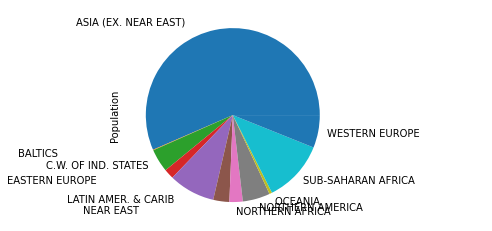

In [ ]:
import matplotlib.pyplot as plt
df_pop.groupby('Region')['Population'].sum().plot(kind='pie')
plt.show()